In [1]:
from CargarTweets import requestCargarTweets
from TrainModels_py47 import trainModels
from Train_ensamble_Stacking import trainEnsambleStacking
from train_ensamble_promedio import trainEnsamblePromedio
from train_ensamble_bagging import trainEnsambleBagging
from crearModeloWord2Vec import crearModeloWord2Vec

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Instructions for updating:
non-resource variables are not supported in the long term



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


data {'preProc': 1, 'maquinas': ['LSTM', 'LSTM-2', 'RCNN', 'BIGRU'], 'unidadesDimensionales': 128, 'dropout': 0.5, 'epochs': 200, 'funcionActivacion': 'sigmoid'}
########################
## MODEL LSTM 
_unidadesDimensionales 128
_dropout 0.5
Shape of LSTM -  (36, 50)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 92,164
Trainable params: 92,164
Non-trainable params: 0
______________________________________________

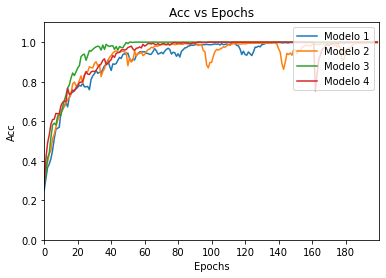

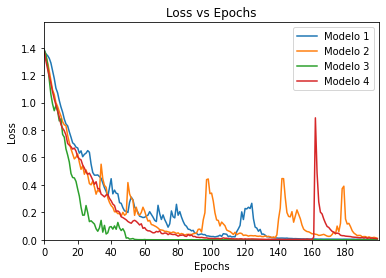

(None, None)

In [3]:
data = {
      'preProc' : 1,
      'maquinas' : ['LSTM', 'LSTM-2', 'RCNN', 'BIGRU'],
      'unidadesDimensionales' : 128,
      'dropout' : 0.5,
      'epochs' : 200,
      'funcionActivacion' : 'sigmoid'
}

trainModels(data)

########################
## MODEL LSTM 
_unidadesDimensionales 128
_dropout 0.5
Shape of LSTM -  (36, 50)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
_________________________________________________________________
activation_5 (Activation)    (None, 4)                 0         
Total params: 92,164
Trainable params: 92,164
Non-trainable params: 0
_________________________________________________________________
Train on 544 samples
Epoch 1/200
544/544 [==============================] - 0s 99us/sample - loss: 1.3756 - acc: 0.2555
Epoch 2/200
544/544 [=

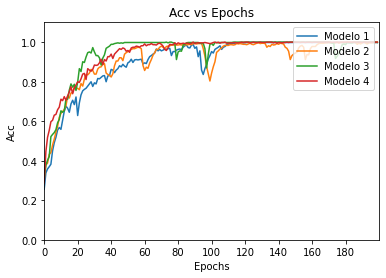

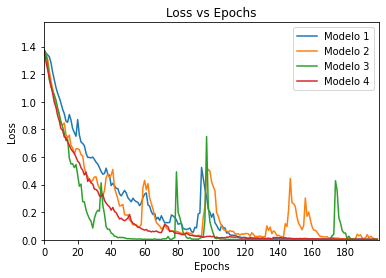

In [4]:
import numpy as np
import os
import pickle
from modelos import *

epochs = 200
units_final = [128,256] #[8,16, 32, 64, 128, 256, 512, 1024]

f = open('preProcDataset_sub_sub.pckl', 'rb')
X_train, X_test, Y_train, Y_test, tree_max_num_seq, w2v50_emb_size = pickle.load(f)
f.close()   

data_final_acc_w2v50 = []
data_final_loss_w2v50 = []


history_final_w2v50_LSTM = []
models_w2v50_LSTM = []

history_final_w2v50_LSTM,models_w2v50_LSTM = perform_final_validation_LSTM(
    X=X_train
    , Y=Y_train
    , X_validate=X_test
    , Y_validate=Y_test
    , _emb_size=w2v50_emb_size
    , _epochs=data['epochs']
    , _dropout = data['dropout']
    , _unidadesDimensionales = data['unidadesDimensionales']
    , _funcionActivacion = data['funcionActivacion']
    , tree_max_num_seq=tree_max_num_seq
)
data_final_acc_w2v50.append(history_final_w2v50_LSTM[0].history['acc'])
data_final_loss_w2v50.append(history_final_w2v50_LSTM[0].history['loss'])

history_final_w2v50_LSTM2 = []
models_w2v50_LSTM2 = []

history_final_w2v50_LSTM2 ,models_w2v50_LSTM2 = perform_final_validation_LSTM2(
    X=X_train
    , Y=Y_train
    , X_validate=X_test
    , Y_validate=Y_test
    , _emb_size=w2v50_emb_size
    , _epochs=data['epochs']
    , _dropout = data['dropout']
    , _unidadesDimensionales = data['unidadesDimensionales']
    , _funcionActivacion = data['funcionActivacion']
    , tree_max_num_seq=tree_max_num_seq
)
data_final_acc_w2v50.append(history_final_w2v50_LSTM2[0].history['acc'])
data_final_loss_w2v50.append(history_final_w2v50_LSTM2[0].history['loss'])

history_final_w2v50_RCNN = []
models_w2v50_RCNN = []

history_final_w2v50_RCNN ,models_w2v50_RCNN = perform_final_validation_RCNN(
    X=X_train
    , Y=Y_train
    , X_validate=X_test
    , Y_validate=Y_test
    , _emb_size=w2v50_emb_size
    , _epochs=data['epochs']
    , _dropout = data['dropout']
    , _unidadesDimensionales = data['unidadesDimensionales']
    , _funcionActivacion = data['funcionActivacion']
    , tree_max_num_seq=tree_max_num_seq
)
data_final_acc_w2v50.append(history_final_w2v50_RCNN[0].history['acc'])
data_final_loss_w2v50.append(history_final_w2v50_RCNN[0].history['loss'])

history_final_w2v50_bigru = []
models_w2v50_bigru = []

history_final_w2v50_bigru, models_w2v50_bigru = perform_final_validation_bigru(
    X=X_train
    , Y=Y_train
    , X_validate=X_test
    , Y_validate=Y_test
    , _emb_size=w2v50_emb_size
    , _epochs=data['epochs']
    , _dropout = data['dropout']
    , _unidadesDimensionales = data['unidadesDimensionales']
    , _funcionActivacion = data['funcionActivacion']
    , tree_max_num_seq=tree_max_num_seq
)
data_final_acc_w2v50.append(history_final_w2v50_bigru[0].history['acc'])
data_final_loss_w2v50.append(history_final_w2v50_bigru[0].history['loss'])


print("Graficando")
##Gráfico de Accuracy
from graficos import graphic_data

imageNameAcc = graphic_data(
    name = 'pre2_acc'
    , dataX=np.arange(0,epochs,20)
    , dataY=data_final_acc_w2v50
    , labels=['Modelo 1','Modelo 2','Modelo 3','Modelo 4','Modelo 5']
    , title='Acc vs Epochs'
    , x_label= 'Epochs'
    , y_label = 'Acc'
    , x_min = 0
    , y_min = 0
    , x_max = epochs
    , y_max = 1+0.1
)

##Gráfico de Loss 
max_loss_w2v50 = 0
for i in np.arange(0,len(data_final_loss_w2v50)):
    if(max(data_final_loss_w2v50[i]) > max_loss_w2v50):
        max_loss_w2v50 = max(data_final_loss_w2v50[i])

imageNameLoss= graphic_data(
    name = 'pre2_loss'
    , dataX = np.arange(0,epochs,20)
    , dataY = data_final_loss_w2v50
    , labels=['Modelo 1','Modelo 2','Modelo 3','Modelo 4','Modelo 5']
    , title = 'Loss vs Epochs'
    , x_label = 'Epochs'
    , y_label = 'Loss'
    , x_min =  0
    , y_min = 0
    , x_max = epochs
    , y_max =  max_loss_w2v50+0.2
)

In [ ]:
data = {
    'maquinas' : ['LSTM', 'LSTM-2', 'RCNN', 'BIGRU']
}
imageEnsambleAcc, imageEnsambleLoss, imageEnsambleMatrix = trainEnsambleStacking(data)